# Exercici de Clustering

### EXERCICI 1: Lectura i preparació del dataset (Jugadors de la NBA 1996-2021)
Per a fer l'exercici de clustering hem escollit el dataset de jugadors de la NBA. Com que la variable objectiu és lliure, hem decicit agrupar els jugadors per tipus segons el seu estil de joc. Les dades a tenir en compte en l'anàlisi s'escolliran un cop netejat el dataset i havent trobat les correlacions entre elles. 

#### 1.1 Importació del dataset

Primer de tot, en el fitxer .csv proporcionat, com que no hi ha nom de la columna al primer camp (el que indica el número de fila), se l'hi ha inserit manualment el nom de 'id'. Encara que és una dada que no es farà servir, hem preferit importar primer tot el dataset correctament i llavors decidir treure aquelles columnes que no siguin necessàries abans de fer l'anàlisi.

Així doncs, s'ha importat el dataset, tenint en compte que alguns camps, com el de 'college', tenen la informació entre cometes. 
Per tal que les dades d'aquells camps no quedin tallades, s'han inclòs les opcions de quotechar i on_bad_lines a l'hora de llegir el fitxer amb las llibreria pandas. Per tenir una vista prèvia de la informació s'ha fet un head(), per veure les 5 primeres línies, i un info(), per veure el tipus de cada camp i els valors nuls.

In [1]:
#Processament de dades
import pandas as pd
#Gràfiques
import matplotlib.pyplot as plt
import seaborn as sns
#Models
import sklearn as skl

import numpy as np

#Importació del dataset (tenint en compte camps que tenen cometes dobles com un sol camp)
dataset = pd.read_csv('all_seasons.csv', quotechar='"', on_bad_lines='skip')

#Informació sobre el dataset importat
display(dataset.head())
print(dataset.info())


,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10985 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

#### 1.2 Modificació del tipus de dades del dataset
S'ha pogut comprovar amb info() que el dataset conté valors nuls només en la columna de 'college'. Per tal de solucionar-ho, en comptes de deixar aquests valors buits, s'han substituït per 'Unknown'. Encara que segurament la variable 'college' no serà molt útil en l'estudi del perfil de jugador, ens assegurem de tenir tot el dataset sencer en cas que s'hagin de fer altres operacions o exercicis.

D'altra banda, també s'ha passat a tipus 'int' aquells camps que són nombres enters (edat, gp...). 

Així doncs, només queda per modificar els valors categòrics abans de començar amb l'anàlisi de les dades.

In [2]:
#Passar a int valors enters
dataset['age'] = dataset['age'].astype(int)
dataset['gp'] = dataset['gp'].astype(int)

#Substituir aquells que son buits
dataset['college'] = dataset['college'].fillna('Unknown')

display(dataset.head())
print(dataset.info())


,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  int64  
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            12844 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

#### 1.3 Tractament dels valors categòrics
Per dedicir com utilitzar les dades categòriques, principalment aquelles que no són numèriques, primer s'han decidit treure directament del dataset aquelles dades que no són importants. Així doncs, no s'han tingut en compte les columnes de id ni nom del jugador. Aquestes dades no aporten informació molt rellevant i així també s'evita feer un One-Hot-Encoding on el resultat siguin milers de columnes, una per cada nom.

A més a més, com que ens hem volgut centrar principalment en estudiar les característiques que poden influir en **l'estil de joc** individual del jugador (tenint en compte només aquelles dades que poden influir en el rendiment del jugador) hem decidit treure: **college, team_abbreviation i country**. Aquestes variables són molt disperses, i tenen a veure més amb l'entorn del jugador que no pas el perfil tècnic.

Així doncs, les dades que s'han dedicit mantenir són: **draft_year, draft_round, draft_number i season**. Aquestes variables en poden ajudar a veure l'evolució esportiva dels jugadors durant les diverses temporades que han jugat en la lliga. Tot i que són dades numèriques (excepte per season, que és una cadena de caràcters), però apareixen de forma repetida, hem decidit categoritzar-ho mitjançant One-Hot-Encoding.

In [ ]:
# Aplicar One-Hot Encoding a les columnes categòriques

print(dataset['draft_year'].unique())
print(dataset['draft_round'].unique())
print(dataset['draft_number'].unique())


dataset_parsed = dataset.drop(columns=['id', 'player_name', 'college', 'team_abbreviation', 'country'])
df_encoded = pd.get_dummies(dataset_parsed, columns=['draft_year', 'draft_round', 'draft_number', 'season'], drop_first=True)
print(df_encoded.head())

['1996' '1994' '1993' '1989' '1995' '1985' '1988' '1991' '1986' '1990'
 '1984' '1987' '1982' '1992' 'Undrafted' '1983' '1981' '1978' '1979'
 '1980' '1976' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '1963' '2012' '2013'
 '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022']
['2' '1' 'Undrafted' '3' '4' '8' '6' '7' '0']
['42' '34' '12' '7' '22' '47' '30' '4' '1' '3' '11' '33' '26' '35' '17'
 '25' '28' '49' '23' '2' '15' '27' 'Undrafted' '37' '38' '13' '18' '9'
 '21' '43' '14' '10' '6' '57' '52' '32' '39' '46' '29' '16' '45' '20' '48'
 '5' '79' '41' '51' '36' '75' '56' '8' '24' '165' '40' '19' '58' '44'
 '139' '54' '127' '124' '50' '160' '63' '31' '69' '53' '55' '120' '87'
 '66' '82' '60' '59' '78' '0']
   age  player_height  player_weight  gp   pts  reb  ast  net_rating  \
0   22         193.04      94.800728  64   3.9  1.5  2.4         0.3   
1   28         190.50      86.182480   4   3.8  1.3  0.3         8.9   
2

#### 1.4 Dades finals
Així doncs, per tal d'analitzar l'estil de joc i rendiment individual del jugador, s'han tingut en compte les següents dades: 
- **Edat, Alçada i Pes**: que són les característiques físiques del jugador.
- **Punts, Rebots, Assistències, Valoració, Partits Jugats, % de rebots ofensius, % de rebots defensius, % de participació en jugades d'atac i % de assistències**: que indiquen el rendiment del jugador a la pista.
- **Any del Draft, Ronda i Número de Draft, Temporada**: que marquen la evolució del jugador al llarg de la seva carrera. 



#### 1.5 Matriu de correlació
Per analitzar la correlació entre les dades numèriques s'ha graficat una matriu de correlació.

De les correlacions positives, les més altes són **Alçada-Pes** i **Assistències-% d'Assistències**. Aquestes relacions són coherents, ja que els jugadors més alts solen pesar més, i el percentatge d'assistències està relacionat amb les assistències.

De les correlacions positives que poden ser útils, hi ha: 
**Punts-% de jugades d'atac**: com més ataca un jugador més punts pot fer; **Punts-Assistències**: com més punts fa, més assistències pot fer... **l'Alçada/Pes amb Rebots** (tant ofensius com defensius): com més alt més pilotes pot agafar...

De les correlacions negatives: **Alçada/Pes - % d'Assistències**: ja que els jugadors alts tendeixen a finalitzar jugades, mentre que els més baixos són els que reparteixen el joc. 

De variables amb correlacions nul·les hi ha l'edat i la valoració, ja que aquestes semblen ser independents de l'estil de joc individual del jugador.

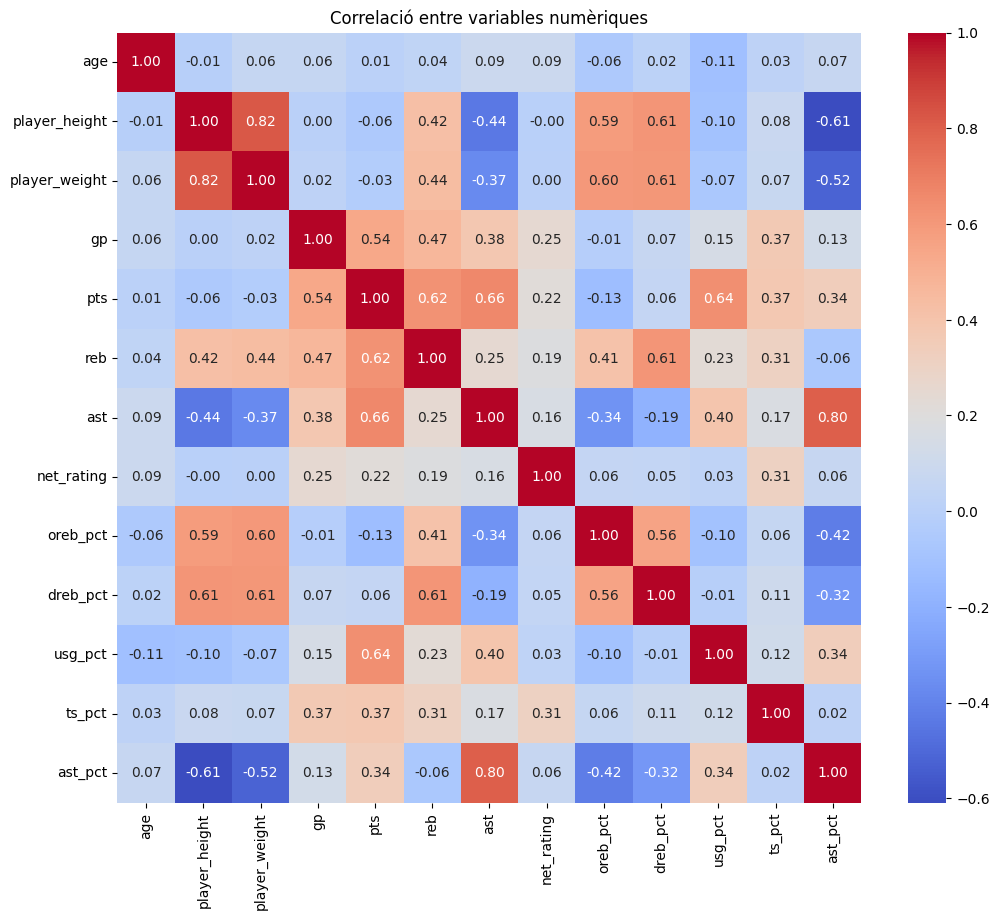

In [4]:
numerical_features = dataset_parsed.select_dtypes(include=['float64', 'int64'])
correlation = numerical_features.corr()

# Heatmap ordenat
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')

plt.title("Correlació entre variables numèriques")
plt.show()

### EXERCICI 2: Selecció i Justificació de les dades abans del clustering


In [5]:
from sklearn.preprocessing import StandardScaler

#Selecció de les dades
columns_performance = ['player_height', 'age', 'pts', 'reb', 'ast', 'usg_pct', 'ts_pct']
X = df_encoded[columns_performance]

#Escalat de les dades
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### EXERCICI 3: Clusterització per K-MEANS


#### 3.1 Trobar número òptim de clústers
Per trobar quin és el millor número de veïns s'han realitzat 2 mètodes d'anàlisi: el mètode del colze i el mètode de la silueta. 

##### Mètode del colze
Si es genera el K-means de forma iterativa, cada cop amb una k diferent, i situem la inèrcia resultant en un gràfic, es pot veure com s'arriba a formar un colze:

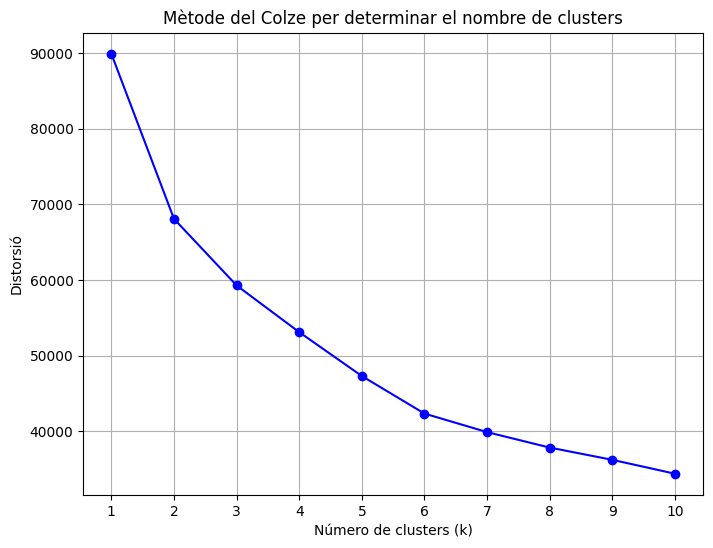

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

distortions = []
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o', linestyle='-', color='b')
plt.title('Mètode del Colze per determinar el nombre de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distorsió')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

#### 3.2 Clusterització final


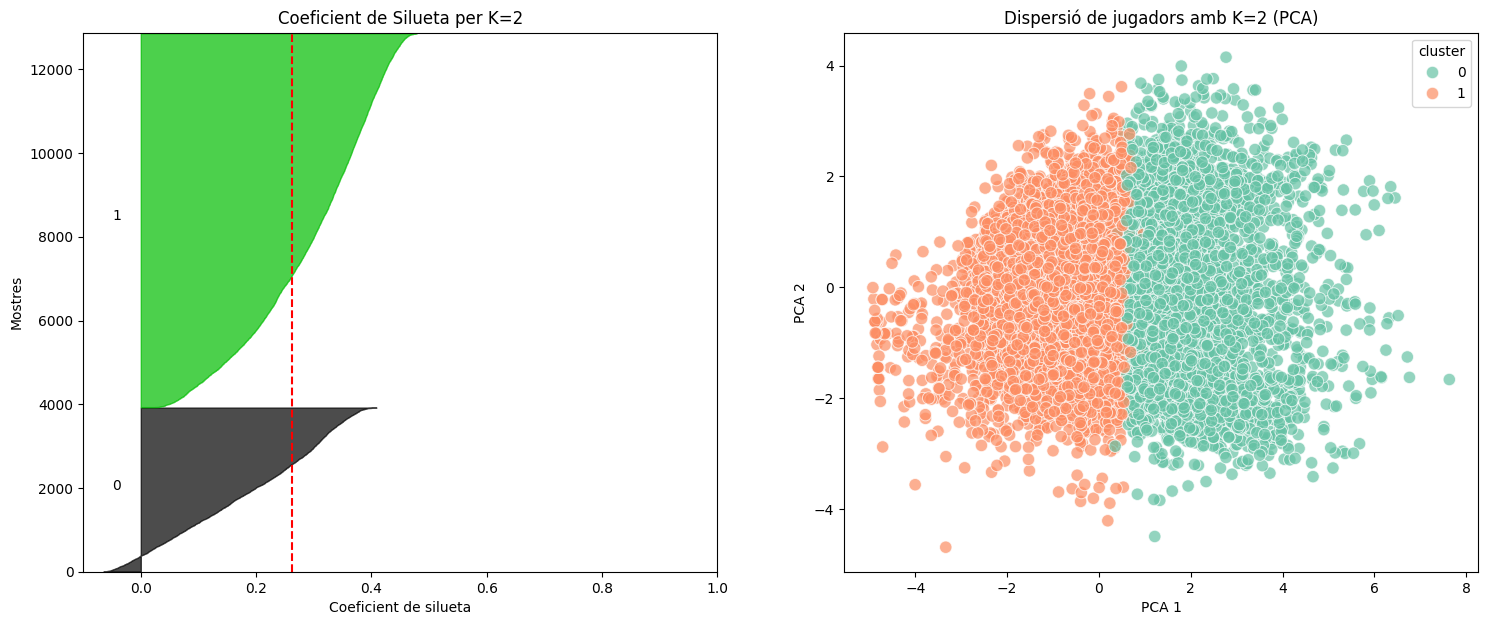

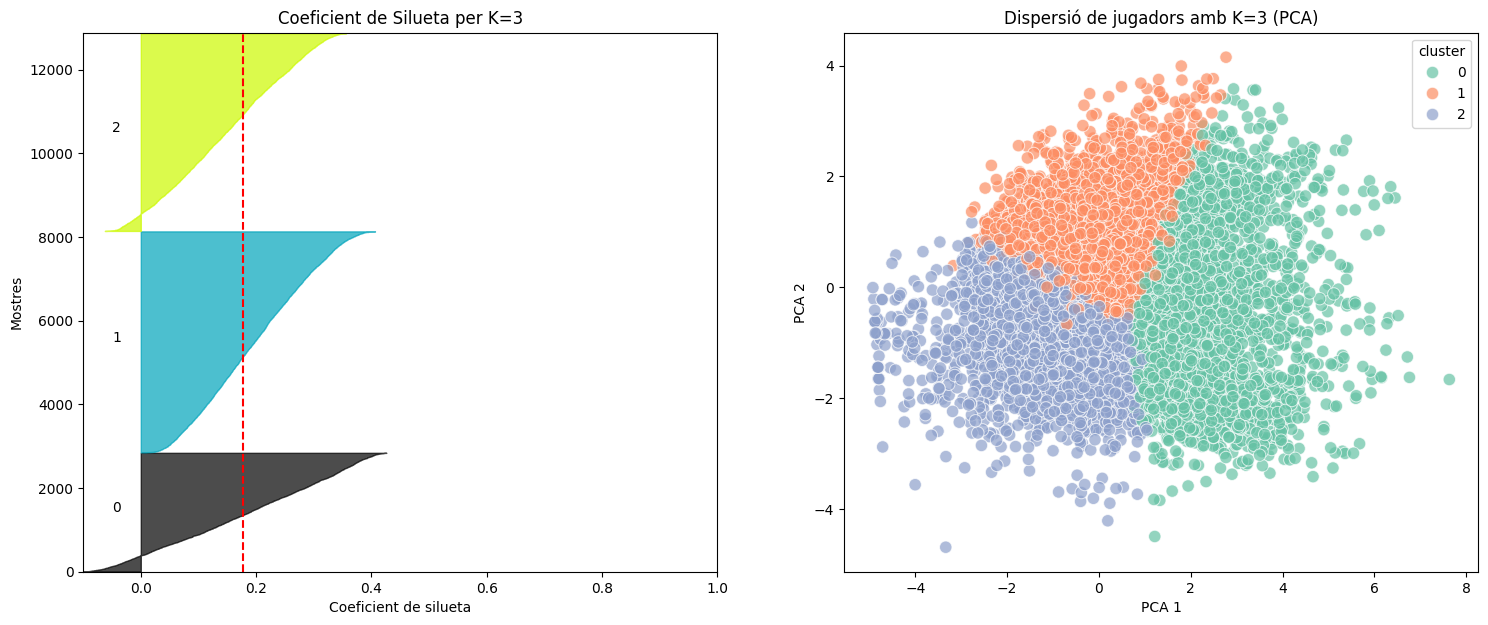

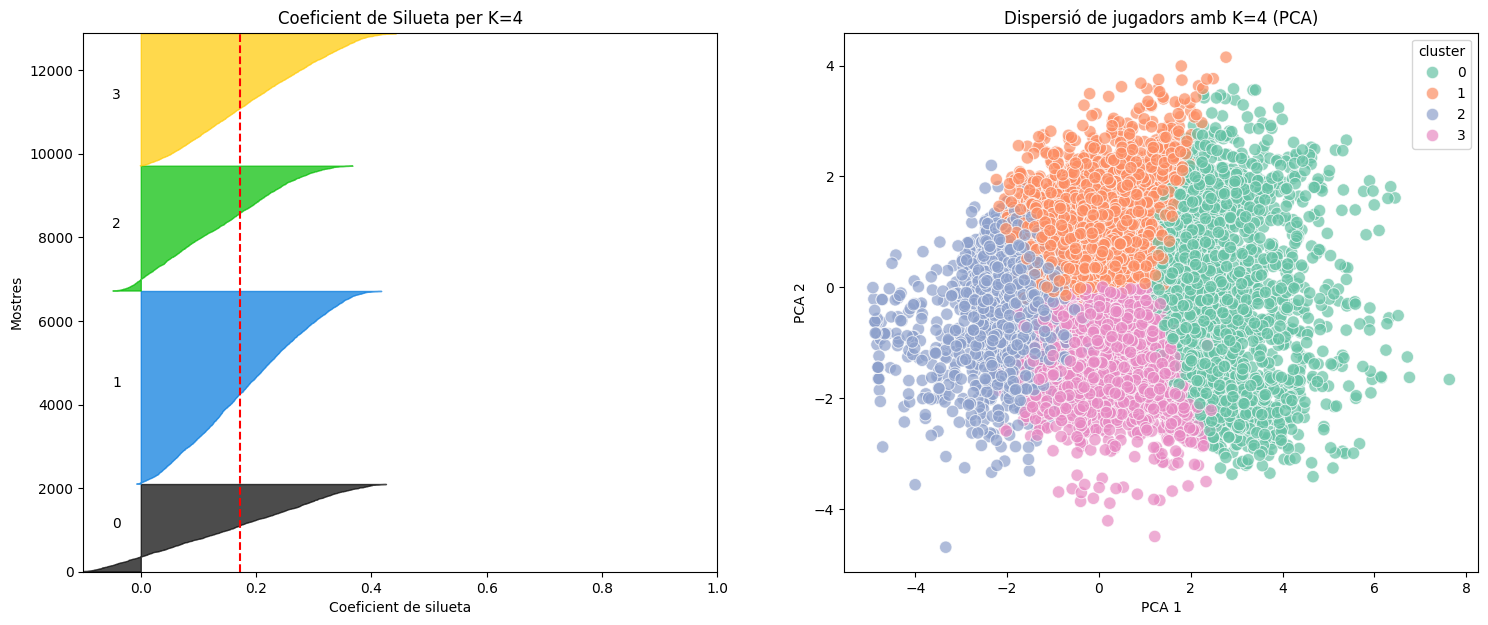

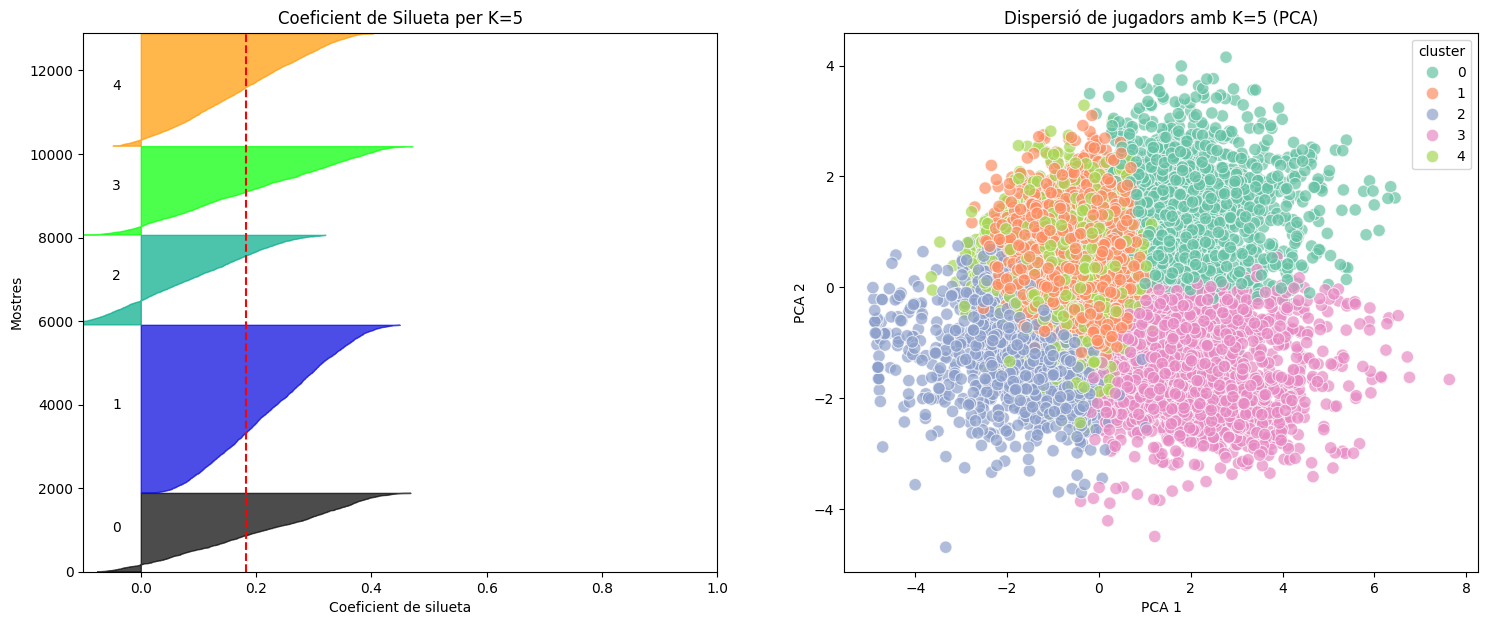

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

k_range = range(2, 6) 

averages = []

for k in k_range:
    fig, (eix1, eix2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)

    #Dibuixar gràfic amb siluetes de cada clúster
    eix1.set_xlim([-0.1, 1])
    eix1.set_ylim([0, len(X_scaled) + (k+1)*10])

    #Calcular KMeans per el valor de k 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    #Valor mitjà de les siluetes
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    #Valor de la silueta per a cada mostra
    sample_silhouette_values = silhouette_samples(X_scaled, kmeans.labels_)
    averages.append(silhouette_avg)

    #Dibuixar siluetes
    y_lower = 10
    for j in range(k):
        cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == j]
        cluster_silhouette_values.sort()

        size_cluster = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(j) / k)

        eix1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        eix1.text(-0.05, y_lower + 0.5 * size_cluster, str(j))
        y_lower = y_upper + 10  

    eix1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    eix1.set_xlabel("Coeficient de silueta")
    eix1.set_ylabel("Mostres")
    eix1.set_title(f"Coeficient de Silueta per K={k}")

    # Visualització de la dispersió de punts
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_scaled)
    dataset = df_encoded.copy()
    dataset['cluster'] = kmeans.labels_
    sns.scatterplot(data=dataset, x=components[:, 0], y=components[:, 1], hue='cluster', palette='Set2', s=80, alpha=0.7, ax=eix2)
    eix2.set_title(f'Dispersió de jugadors amb K={k} (PCA)')
    eix2.set_xlabel('PCA 1')
    eix2.set_ylabel('PCA 2')


En resum:

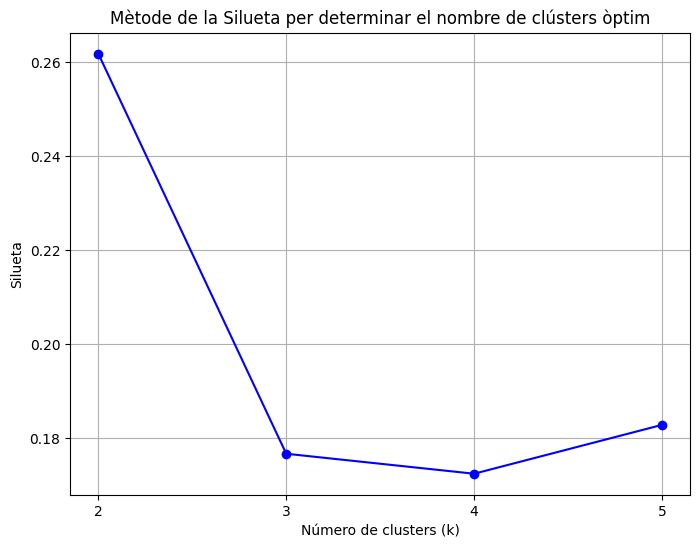

In [8]:
#Dibuixar gràfic amb mitjanes
plt.figure(figsize=(8, 6))
plt.plot(k_range, averages, marker='o', linestyle='-', color='blue')
plt.title('Mètode de la Silueta per determinar el nombre de clústers òptim')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silueta')
plt.xticks(k_range)
plt.grid(True)
plt.show()

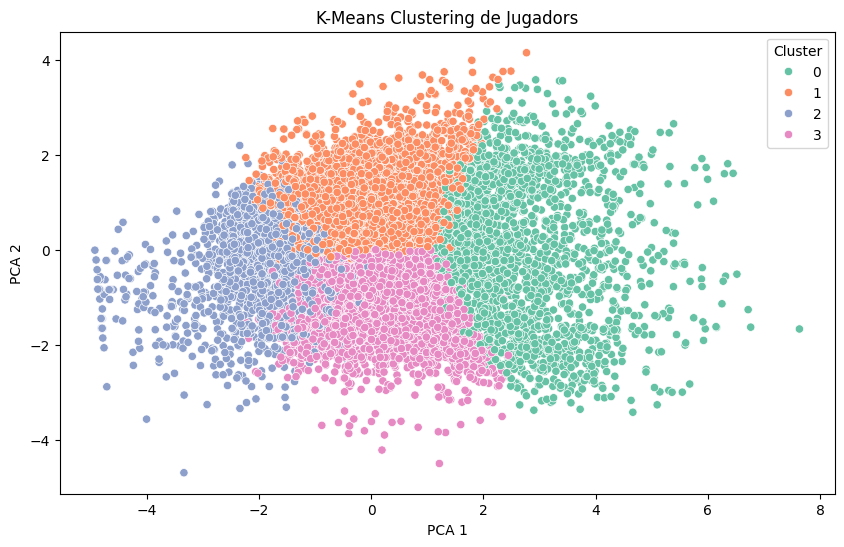

         player_height  player_weight    age    pts   reb   ast  usg_pct  \
cluster                                                                    
0               200.34         100.67  26.88  18.74  6.19  4.15     0.25   
1               206.88         107.82  27.57   7.31  4.57  1.06     0.17   
2               201.75         100.93  25.65   2.60  1.58  0.55     0.16   
3               190.34          88.35  27.70   7.88  2.21  2.60     0.19   

         ts_pct  net_rating  
cluster                      
0          0.55        1.35  
1          0.56       -1.00  
2          0.41       -7.34  
3          0.52       -1.55  


In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
dataset['cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
dataset['pca1'] = components[:, 0]
dataset['pca2'] = components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('K-Means Clustering de Jugadors')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

cluster_profiles = dataset.groupby('cluster')[['player_height', 'player_weight', 'age', 'pts', 'reb', 'ast', 'usg_pct', 'ts_pct', 'net_rating']].mean().round(2)
print(cluster_profiles)



#### 3.3 Resultats del K-MEANS

### EXERCICI 4: Clusterització per DBSCAN

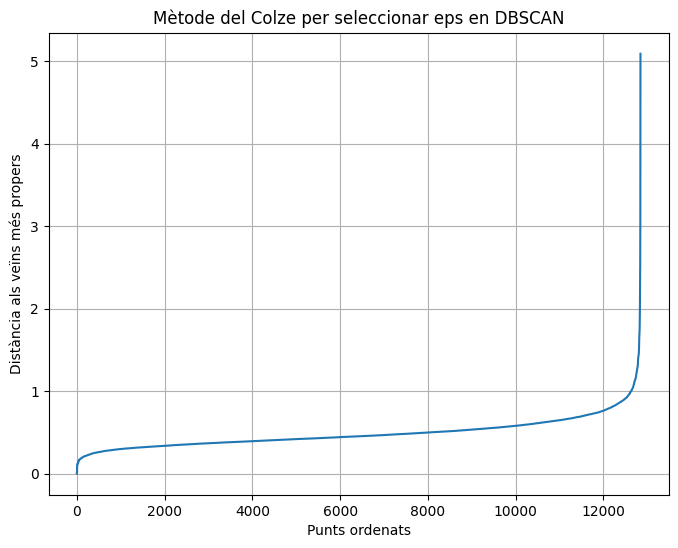

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mètode del colze per trobar el millor valor d'eps
neigh = NearestNeighbors(n_neighbors=2 * len(columns_performance))  
neigh.fit(X_scaled)
distances, indices = neigh.kneighbors(X_scaled)
sorted_distances = np.sort(distances[:, 1], axis=0)  

# Gràfic del mètode del colze per DBSCAN
plt.figure(figsize=(8, 6))
plt.plot(sorted_distances)
plt.title('Mètode del Colze per seleccionar eps en DBSCAN')
plt.xlabel('Punts ordenats')
plt.ylabel('Distància als veïns més propers')
plt.grid(True)
plt.show()


:

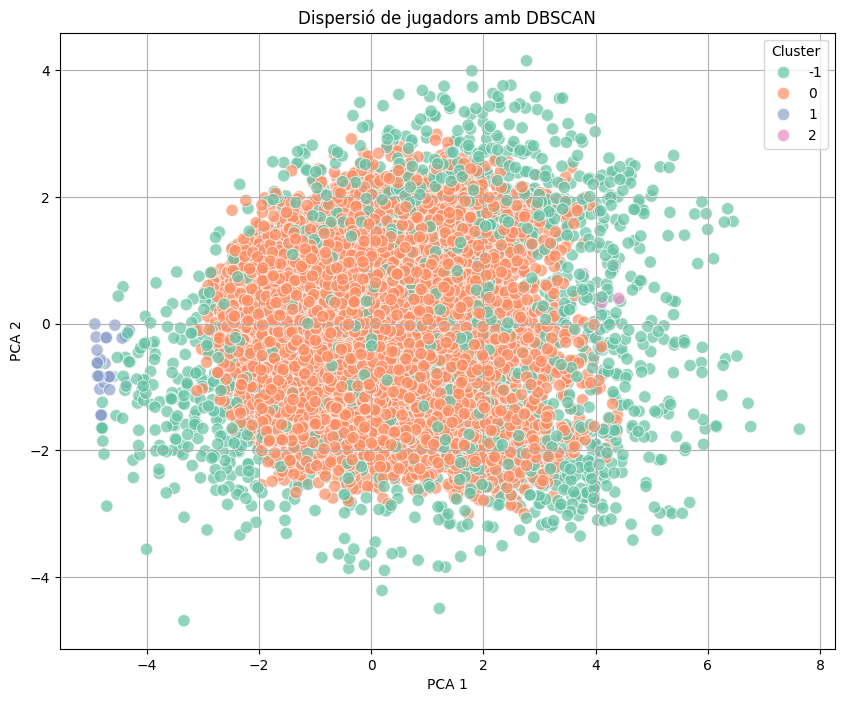

In [11]:

eps = 0.85
min_samples = 2 * len(columns_performance)

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X_scaled)

labels = dbscan.labels_

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
dataset = df_encoded.copy()
dataset['cluster'] = labels

plt.figure(figsize=(10, 8))
sns.scatterplot(data=dataset, x=components[:, 0], y=components[:, 1], hue='cluster', palette='Set2', s=80, alpha=0.7)
plt.title(f'Dispersió de jugadors amb DBSCAN')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


